In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
data = pd.read_csv("ortopedik_hastaların_biyomekanik_özellikleri_20220209.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


No handles with labels found to put in legend.


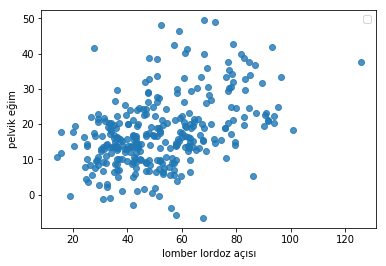

In [3]:
sns.regplot(data=data,x="lumbar_lordosis_angle", y="pelvic_tilt numeric",fit_reg=False)
plt.xlabel("lomber lordoz açısı")
plt.ylabel("pelvik eğim")
plt.legend()
plt.show()

In [4]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


In [5]:
y = data["class"].values
x_data = data.drop(["class"],axis =1)

In [6]:
#normalizasyon
x= (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))

In [7]:
#eğiitm test olarak bölünmesi
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size =0.15 ,random_state=1)

K-En yakın komşu algoritmasının eğitimi ve testi

In [8]:

from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = 4
knn=KNeighborsClassifier(n_neighbors = komsu_sayisi)
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
print("{} En yakın komşu modeli testi doğruluk : {}".format(komsu_sayisi,knn.score(x_test,y_test)))


4 En yakın komşu modeli testi doğruluk : 0.6382978723404256


En iyi k değerinin bulunması 
Veri setim küçükse yapılabilir

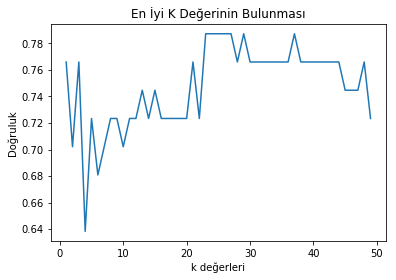

In [9]:
score_list =[]
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    

plt.plot(range(1,50),score_list)
plt.xlabel("k değerleri")
plt.ylabel("Doğruluk")
plt.title("En İyi K Değerinin Bulunması")
plt.show()

DESTEK VEKTÖR MAKİNESİ

In [10]:
from sklearn.svm import SVC
svm= SVC(random_state=1)
svm.fit(x_train,y_train)

print("Destek Vektör Makinesi Modeli Test Doğruluk  {}".format(svm.score(x_test,y_test)))

Destek Vektör Makinesi Modeli Test Doğruluk  0.6170212765957447


Karar Ağacı  

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

print("Karar Ağacı Modeli Test Doğruluk {}".format(dt.score(x_test,y_test)))

Karar Ağacı Modeli Test Doğruluk 0.8297872340425532


Rastgele Orman

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf  = RandomForestClassifier(n_estimators = 100 ,random_state=1)#100 tane karar ağacı
rf.fit(x_train,y_train)

print("Rastgele Orman Modeli Test Doğruluk {}".format(rf.score(x_test,y_test)))

Rastgele Orman Modeli Test Doğruluk 0.8723404255319149


In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm= confusion_matrix(y_test,y_pred)
cm

array([[14,  3],
       [ 3, 27]], dtype=int64)

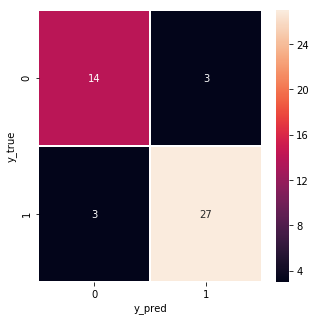

In [14]:
#sıcaklık haritası
f,ax= plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True , linewidths =0.5 , linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

KÜMELEME

Gözetimsiz öğrenme


K-ORTALAMA kümeleme
HİYERARŞİK kümeleme

In [17]:
#K-ORTALAMA 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [19]:
#veri setii oluşturma 

#küme1
x1=np.random.normal(25,5,1000)
y1=np.random.normal(25,5,1000)

#küme2
x2=np.random.normal(55,5,1000)
y2=np.random.normal(60,5,1000)

#küme3
x3=np.random.normal(55,5,1000)
y3=np.random.normal(15,5,1000)

#uc uca ekledim
x=np.concatenate((x1,x2,x3),axis=0)
y=np.concatenate((y1,y2,y3),axis=0)

dictionary ={"x":x,"y":y}

data=pd.DataFrame(dictionary)
data.head()

,x,y
0,23.617329,22.098880
1,21.248951,28.094899
2,16.935957,30.657605
3,26.597711,32.306055
4,30.309953,24.800162


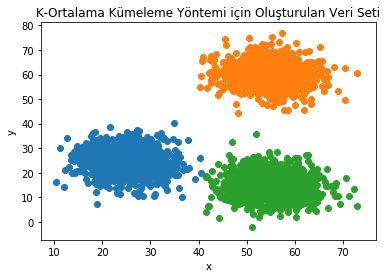

In [20]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)

plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()

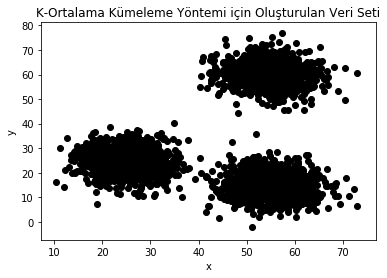

In [22]:
#k ortalama algoritması ile veriyi böyle görecek
plt.figure()
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.scatter(x3,y3,color="black")

plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()

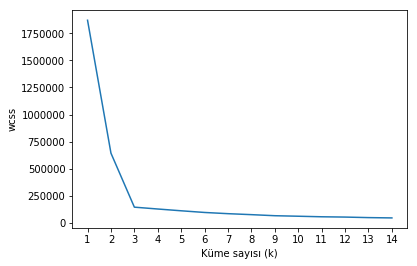

In [26]:
# k değerinin seçimi: dirsek yöntemi
from sklearn.cluster import KMeans
wcss=[]

for k in range(1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("Küme sayısı (k)")
plt.ylabel("wcss")
plt.show()

# biz zaten biliyorduk 3 olduğunu ama algoritmanın bulmasını bekledik

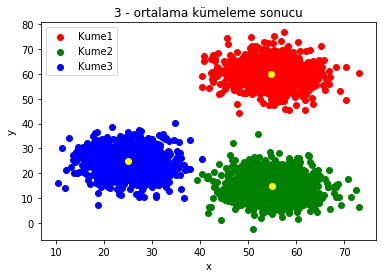

In [31]:
k_ortalama =KMeans(n_clusters =3)
kumeler = k_ortalama.fit_predict(data)

data["label"] = kumeler

plt.figure()
plt.scatter(data.x[data.label ==0],data.y[data.label==0],color="red",label="Kume1")
plt.scatter(data.x[data.label ==1],data.y[data.label==1],color="green",label="Kume2")
plt.scatter(data.x[data.label ==2],data.y[data.label==2],color="blue",label="Kume3")
plt.scatter(k_ortalama.cluster_centers_[:,0],k_ortalama.cluster_centers_[:,1],color="yellow")#merkezlar

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3 - ortalama kümeleme sonucu")
plt.show()

Hiyerarşik Kümeleme

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [33]:
#veri setii oluşturma 

#küme1
x1=np.random.normal(25,5,20)
y1=np.random.normal(25,5,20)

#küme2
x2=np.random.normal(55,5,20)
y2=np.random.normal(60,5,20)

#küme3
x3=np.random.normal(55,5,20)
y3=np.random.normal(15,5,20)

#uc uca ekledim
x=np.concatenate((x1,x2,x3),axis=0)
y=np.concatenate((y1,y2,y3),axis=0)

dictionary ={"x":x,"y":y}

data=pd.DataFrame(dictionary)
data.head()

,x,y
0,29.881130,32.332200
1,26.370558,21.764528
2,23.269620,21.078781
3,27.317672,25.140938
4,22.414402,31.905886


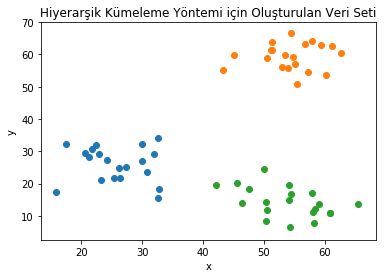

In [34]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Hiyerarşik Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()

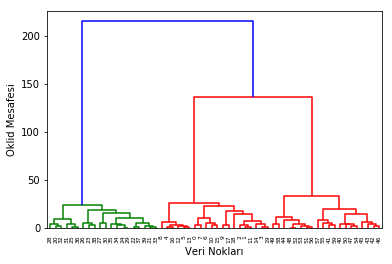

In [36]:
# %% dendogram 
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(data,method="ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("Veri Nokları")
plt.ylabel("Oklid Mesafesi")
plt.show()

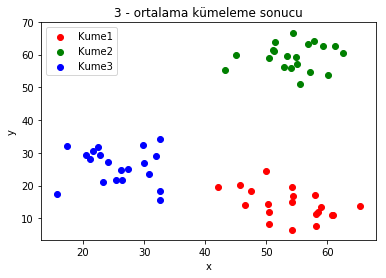

In [38]:
from sklearn.cluster import AgglomerativeClustering

hiyerarsi_küme = AgglomerativeClustering(n_clusters=3,affinity ="euclidean",linkage="ward")
kume=hiyerarsi_küme.fit_predict(data)

data["label"] =kume

plt.figure()
plt.scatter(data.x[data.label ==0],data.y[data.label==0],color="red",label="Kume1")
plt.scatter(data.x[data.label ==1],data.y[data.label==1],color="green",label="Kume2")
plt.scatter(data.x[data.label ==2],data.y[data.label==2],color="blue",label="Kume3")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3 - ortalama kümeleme sonucu")
plt.show()